# Regression use-case using Boston House Prices Dataset

In [31]:
%matplotlib inline
import matplotlib.pyplot
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
# Reference for customizing matplotlib: https://matplotlib.org/users/style_sheets.html
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Load Bosting housing data
regressor_data = load_boston()
# Get information about the data
print(regressor_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [32]:
# Build the training set
regressor_X = regressor_data.data
regressor_y = regressor_data.target
regressor_example = regressor_X[1]

# Pick Algorithm of choice to build a model
regressor = GradientBoostingRegressor()
regressor.fit(regressor_X, regressor_y)

# Select single covariate or multiple covariates
regressor_feature_id = [5]
regressor_feature_name = [regressor_data.feature_names[i]]
print(regressor_feature_name)

regressor_feature_ids = [12, 5]
regressor_feature_names = [regressor_data.feature_names[i] for i in regressor_feature_ids]
print(regressor_feature_names)

['RM']
['LSTAT', 'RM']


## Use Skater to start carving the model bahvior
* Globally 
    - using model agnostic partial dependence plot
    - model agnostic Feature importance
* Locally 
    - using LIME(Local Interpretable Model Explanation) - by Marco Tulio Ribeiro, Sameer Singh and Carlos Guestrin

In [22]:
from skater.core.explanations import Interpretation
interpreter = Interpretation()
interpreter?

In [23]:
interpreter.partial_dependence.partial_dependence?

In [24]:
from skater.data import DataManager
DataManager?

In [25]:
from skater.model import InMemoryModel
InMemoryModel?

In [26]:
from skater.model import DeployedModel
DeployedModel?

In [27]:
# Skater is intutively designed to support 
# - InMemoryModel : A model which is currently being built and estimator instance is still in the scope
# - DeployedModel: A model which is operationalized, or a third party deployed model
annotated_model = InMemoryModel(regressor.predict, examples=regressor_X)
print "Number of classes: {}".format(annotated_model.n_classes)
print "Input shape: {}".format(annotated_model.input_shape)
print "Model Type: {}".format(annotated_model.model_type)
print "Output Shape: {}".format(annotated_model.output_shape)
print "Output Type: {}".format(annotated_model.output_type)
print "Returns Probabilities: {}".format(annotated_model.probability)

Number of classes: 1
Input shape: (506, 13)
Model Type: regressor
Output Shape: (506,)
Output Type: continuous
Returns Probabilities: not applicable


2-way partial dependence plots
1-way partial dependence plots


[[<matplotlib.figure.Figure at 0x7f75b5224650>,

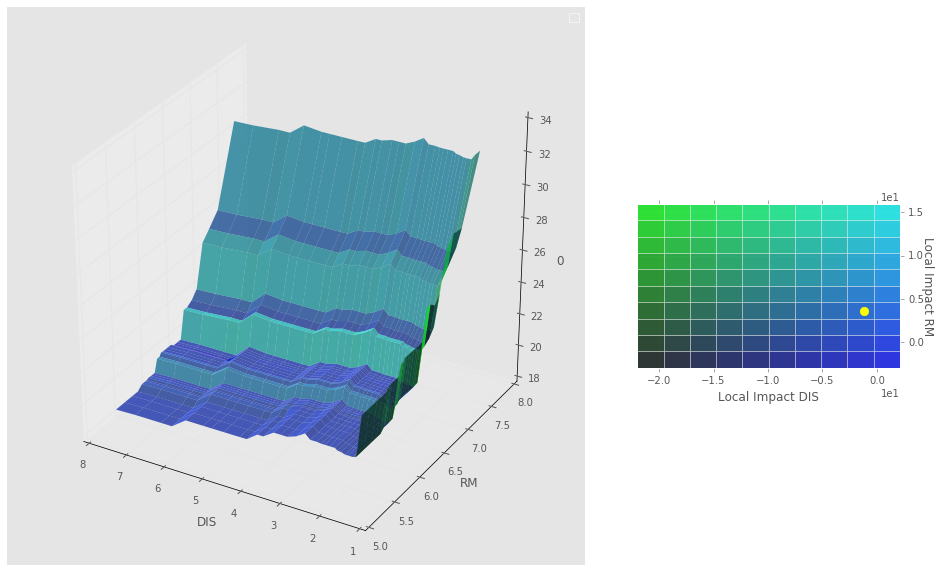

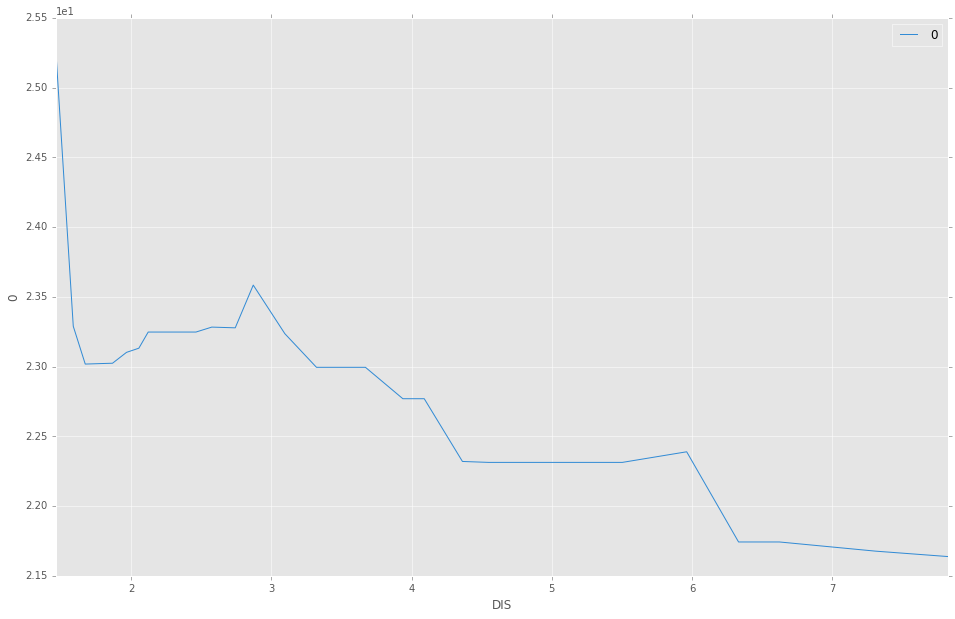

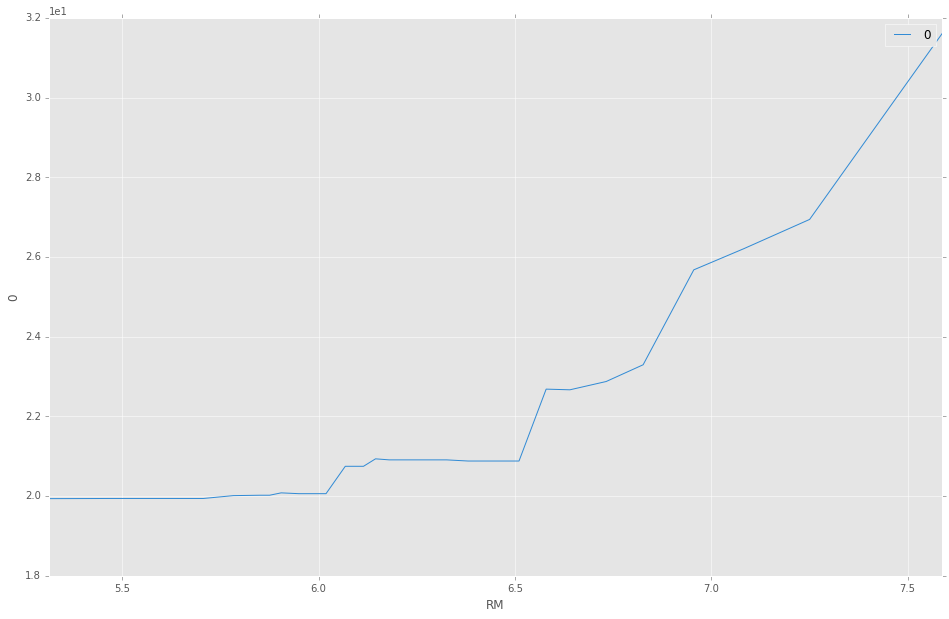

In [30]:
# Load the data and visualize it using Parital Dependence plot to understand feature interaction contributing to 
# the housing prediction
interpreter.load_data(regressor_X, feature_names=regressor_data.feature_names)

print("2-way partial dependence plots")
# Features can passed as a tuple for 2-way partial plot
pdp_features = [('DIS', 'RM')]
interpreter.partial_dependence.plot_partial_dependence(
    pdp_features, annotated_model, grid_resolution=30
)

print("1-way partial dependence plots")
# or as independent features for 1-way partial plots
pdp_features = ['DIS', 'RM']
interpreter.partial_dependence.plot_partial_dependence(
    pdp_features, annotated_model, grid_resolution=30
)

[[<matplotlib.figure.Figure at 0x7f75b506b210>,

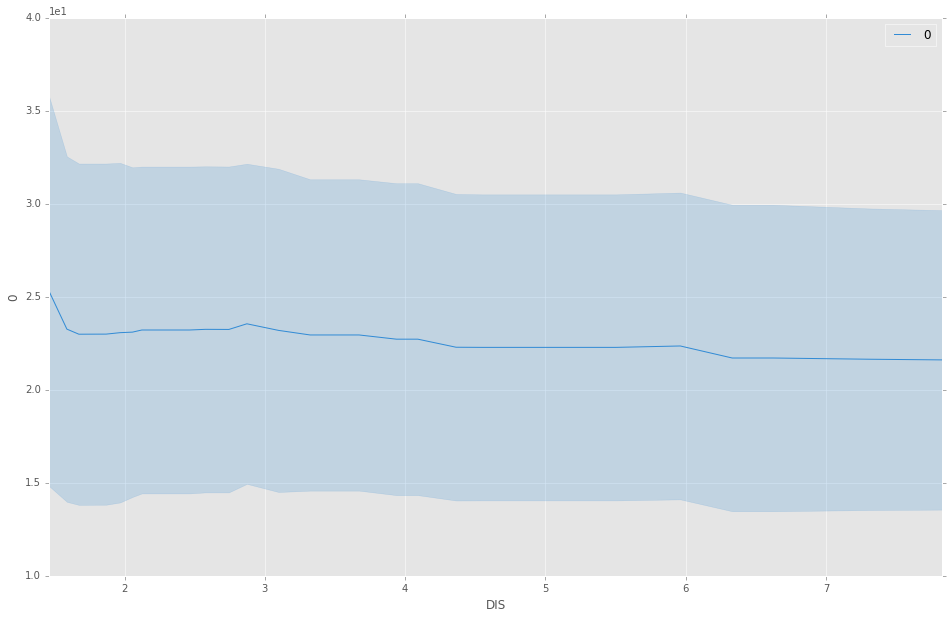

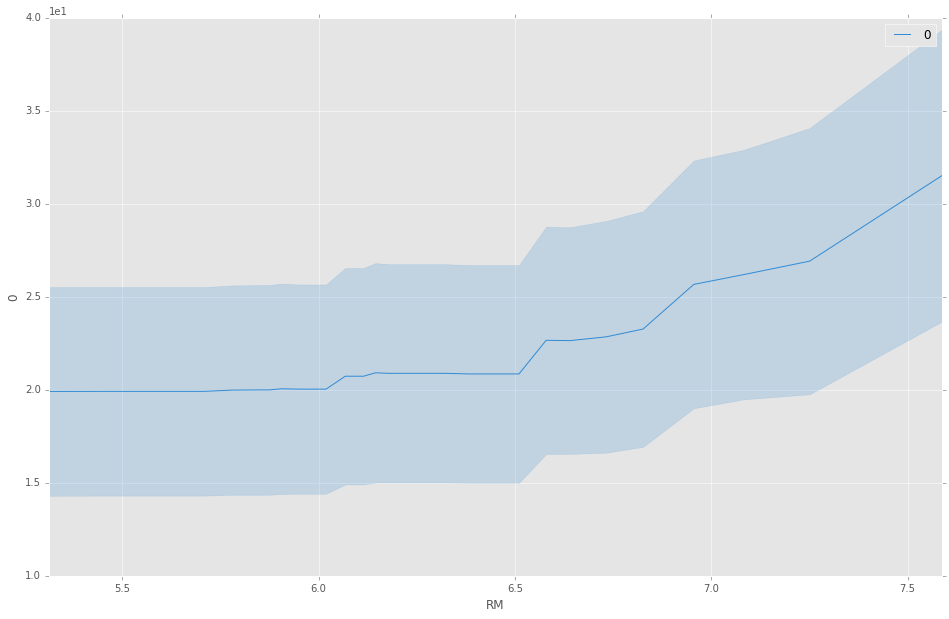

In [29]:
# Partial Plot with variance effect
interpreter.partial_dependence.plot_partial_dependence(
    pdp_features, annotated_model, grid_resolution=30, with_variance=True
)

In [34]:
# Local interpretation using improved version of LIME. 
# Allows one to focus and understand feature contribution for an individual prediction using surrogate models 
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

# create an explainer
explainer = LimeTabularExplainer(regressor_X, feature_names=regressor_data.feature_names)

# explain something
explanation = explainer.explain_regressor_instance(regressor_X[0], annotated_model)

# show the explanation
explanation.show_in_notebook()